**First we import the neccessary libraries that we are going to use to solve our problem**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree,svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

**Next we import the train.csv file with the help of pandas librabry, that we have already downloaded from kaggle along
with all the other Titanic problem datasets. Then we load the data to see the columns conatining in train.csv file**

In [2]:
train_data = pd.read_csv("train.csv")
train_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### The data from the training set shows the info of the passengers that travelled on the titanic and along it we can see the survived column which tells us who survived the disaster and who didn't.

**Survival: This variable tells us whether the person survived or not. This is our target variable & we have to predict its    
  value. It’s a binary variable. 0 = not survived and 1 = survived.**
  
**sibsp: The no. of siblings or spouses of a particular passenger who were there on the ship.**

**parch: The no. of parents or children of a particular passenger who were there on the ship.**

**embarked: Port of Embarkation; From where that passenger took the ship. ( C = Cherbourg, Q = Queenstown, S = Southampton**


### Next we try to explore the data contained in our training set :

**we call the functions .info, .isnull().sum() and .hist to get better perpectives of the training set data. We get to exlpore
the columns containing no values, the column's data types, and the columns containing categorical values. These explorations will help us in the future to decide what to do with the columns containg missing values and categorical data.**

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

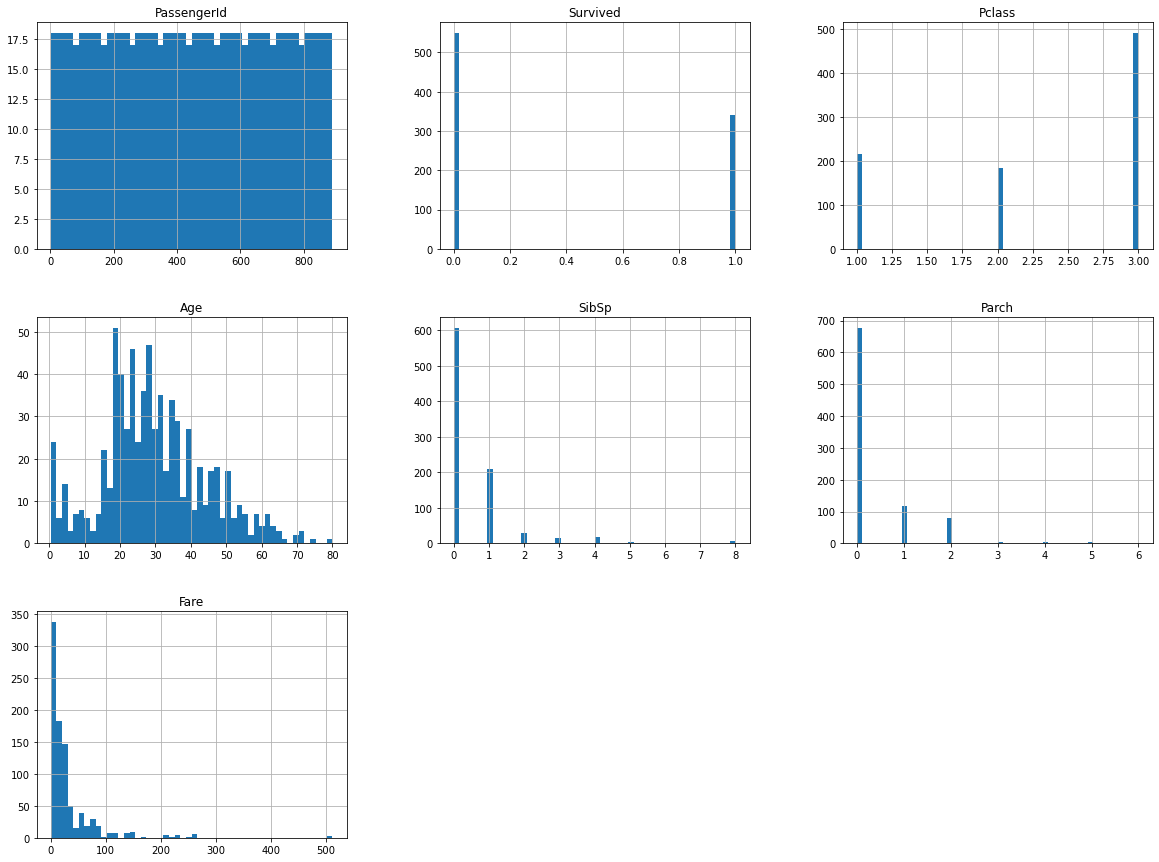

In [5]:
train_data.hist(bins=50, figsize=(20,15))
plt.show()

### We have found that some colums have missing values and categorical values. So that means we will have to preprocess our data first before training our ml model.

# Correlation :

## Next we will look for Correlation between other column's data and the target variable (Survived).

**This will help us check which variables are actually important to predict the value of the target variable, "Survived".**

In [6]:
corr_matrix = train_data.corr()

In [7]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

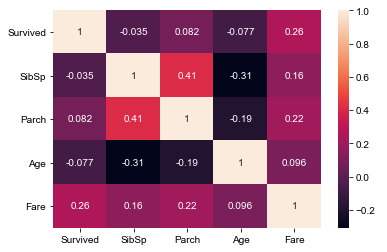

In [8]:
heatmap = sns.heatmap(train_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

### Using correaltion matrix and heat map we can see only fare and parch column are somewhat correlated.

**correlation value close to +1 suggests that particular variable is highly correlated to the target field. And on the heatmap the lighter the corresponding field are to the target varriable suggests more correlation**

##### Next, we will try to understand all the features one by one. We’ll try to visualize the impact of each feature on our target variable, Survived.

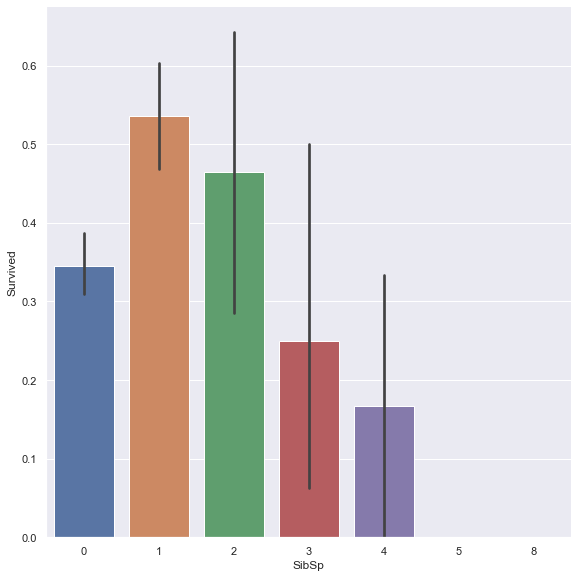

In [9]:
train_data['SibSp'].unique()
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = train_data, kind="bar", height = 8)

### We try to visualize surviving probability with respect to SibSp by ploting a bar graph.

##### we see from the graph that Passengers having 1 or 2 siblings have more chances of survival and that more no. of siblings than that means less chance of survival.



D:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


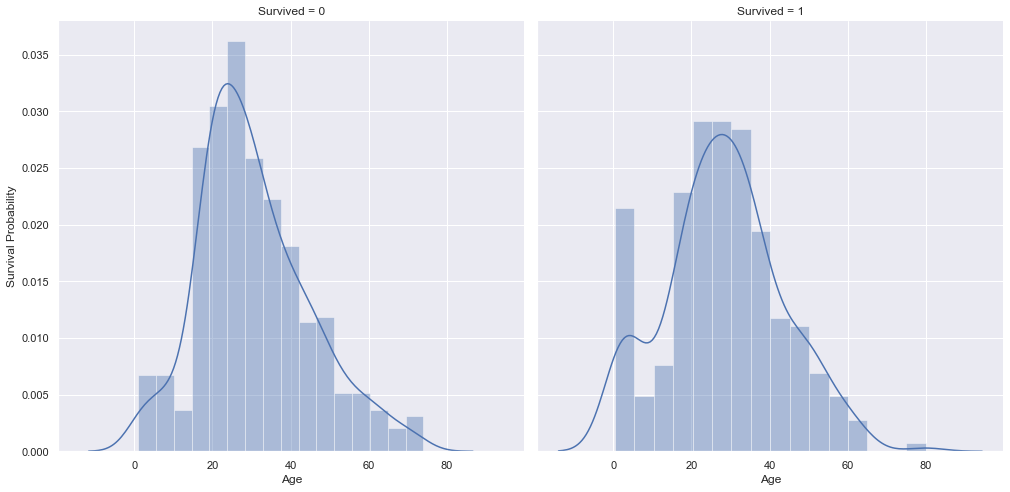

In [10]:
ageplot = sns.FacetGrid(train_data, col="Survived", height = 7)
ageplot = ageplot.map(sns.distplot, "Age")
ageplot = ageplot.set_ylabels("Survival Probability")

### We next try to visualize surviving probability with respect to the distribution of age by ploting a graph.

##### we find from graph that elder people have less chance of survival.

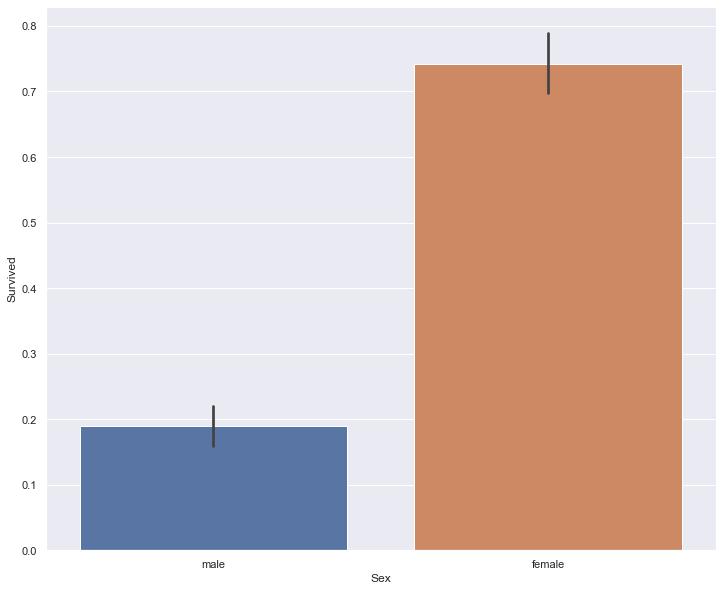

In [11]:
sexplot = sns.barplot(x="Sex", y="Survived", data=train_data)

### Next we are simply going to use seaborn and will plot a bar graph to find the relation with survivability.

##### we clearly see female passengers have more chances to survive.

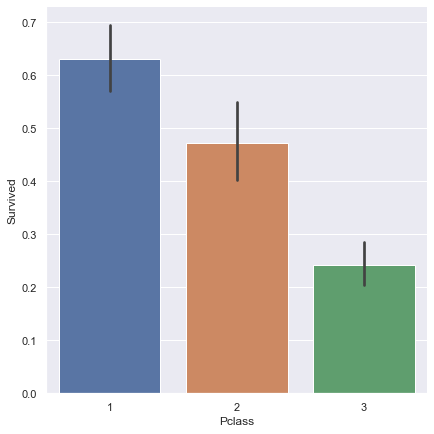

In [12]:
pclassplot = sns.catplot(x = "Pclass", y="Survived", data = train_data, kind="bar", height = 6)

### We then check whether the class plays any role in survival probability or not by plotting a bar graph.

##### so, we can deduce from the class that higher the class of a passenger better the chance of surviving

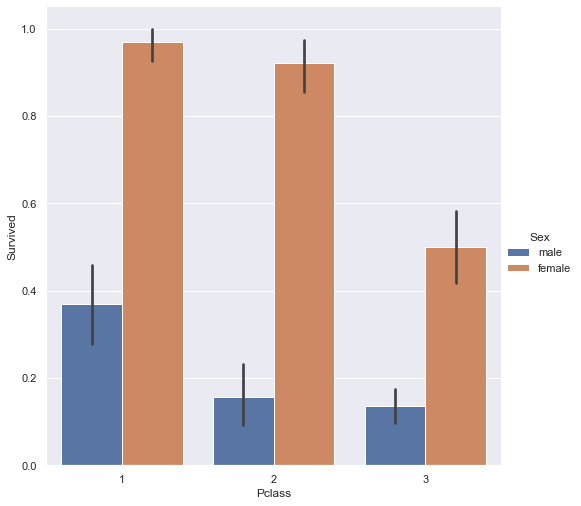

In [13]:
a = sns.catplot(x = "Pclass", y="Survived", hue="Sex", data=train_data, height = 7, kind="bar")

#### Next we can see that female passengers of any class has more chances of surving.

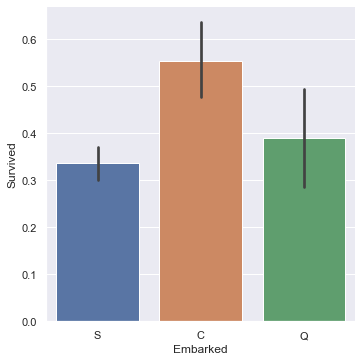

In [14]:
sns.catplot(x="Embarked", y="Survived", data=train_data, height = 5, kind="bar")

### Finally, we look for relation between the embarked station and the chances of Survivability.

##### passengers those embarked from point C has the most chances of surviving.

# Data Preprocessing :

### After exploring the correlations between the target column and other varriables, we deduce that we can drop some colums those will not be needed to make our target prediction. So we drop them using the drop function. 

In [15]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
train_data.drop(col_to_drop, axis=1, inplace=True)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


### We have seen while exploring the data initially that Embarked and Age column have missing values so we need to fill them with suitable values . First we do this for the Embarked colum.

##### For the Embarked column we fill the missing values with the most appeared Embarked's column value. For that first we check which value appeared the most using value_count() and then fill the the column with the most appeared value using .fillna() function.

In [16]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [17]:
train_data["Embarked"] = train_data["Embarked"].fillna('S')


### Next we shall fill the age's column missing value with median age of the passengers

In [18]:
median = train_data["Age"].median()
print(median)

28.0


In [19]:
rand_age = np.random.randint(median, size = 177)
age_slice = train_data["Age"].copy()

age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice

## Our next work is to fill the categorical values in Sex column and Embarked column with Numerical Values. For That we use OrdinalEncoder Function.

In [20]:
train_data_sex = train_data[["Sex"]]
ordinal_encoder = OrdinalEncoder()
train_data["Sex"] = ordinal_encoder.fit_transform(train_data_sex)


In [21]:
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,S
1,1,1,0.0,38.0,1,0,71.2833,C
2,1,3,0.0,26.0,0,0,7.9250,S
3,1,1,0.0,35.0,1,0,53.1000,S
4,0,3,1.0,35.0,0,0,8.0500,S
5,0,3,1.0,27.0,0,0,8.4583,Q
6,0,1,1.0,54.0,0,0,51.8625,S
7,0,3,1.0,2.0,3,1,21.0750,S
8,1,3,0.0,27.0,0,2,11.1333,S
9,1,2,0.0,14.0,1,0,30.0708,C


In [22]:
train_data_embarked = train_data[["Embarked"]]
ordinal_encoder = OrdinalEncoder()
train_data["Embarked"] = ordinal_encoder.fit_transform(train_data_embarked)
train_data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0
5,0,3,1.0,27.0,0,0,8.4583,1.0
6,0,1,1.0,54.0,0,0,51.8625,2.0
7,0,3,1.0,2.0,3,1,21.0750,2.0
8,1,3,0.0,27.0,0,2,11.1333,2.0
9,1,2,0.0,14.0,1,0,30.0708,0.0


## We can see that we have succesfully proprocessed our data and filled up the missing values and also changed the categorical values to Numerical values using OrdinalEncoder. Now we are ready to start training our ML model to the training data.

In [23]:
df_train_x = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Target variable column
df_train_y = train_data[['Survived']]

x_train, x_test, y_train, y_test = train_test_split(df_train_x, df_train_y, test_size=0.20, random_state=42)

# We will apply 4 different classification algorithm to our model to deicde on the best model to use, those are:

## Random Forest Classifier, Logistic Regression, K-Neighbor Classifier, Decision Tree Classifier.

#### Before traing the model, we are going to define the x and y variable for this problem. We will set the values in Survived column to be (y). Meanwhile, all other columns are going to be our features (x). Also, we will be separating the data into train/test, which will be done using train_test_split() function coming from Sklearn module. We will use 20% of the data as the test set.

#### Now as we get both train and test data, we can start applying 4 different classification models.



In [24]:
clf1 = RandomForestClassifier()
clf1.fit(x_train, y_train)
rfc_y_pred = clf1.predict(x_test)
rfc_accuracy = accuracy_score(y_test,rfc_y_pred) * 100
print("accuracy=",rfc_accuracy)

accuracy= 81.00558659217877


<ipython-input-24-6a6be2d08e9a>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf1.fit(x_train, y_train)


## We have applied the RandomForestClassifier, and also found an idea of the accuray that it gives using the accuracy_score function. The accuracy is 82.68156424581005.

In [25]:
clf2 = LogisticRegression()
clf2.fit(x_train, y_train)
lr_y_pred = clf2.predict(x_test)
lr_accuracy = accuracy_score(y_test,lr_y_pred)*100

print("accuracy=",lr_accuracy)

accuracy= 78.77094972067039


D:\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


## We we applied the LogisticRegression() classification, and found the accuracy is = 78.2122905027933 

In [26]:
clf3 = KNeighborsClassifier(5)
clf3.fit(x_train, y_train)
knc_y_pred = clf3.predict(x_test)
knc_accuracy = accuracy_score(y_test,knc_y_pred)*100

print("accuracy=",knc_accuracy)

accuracy= 67.59776536312849


D:\Software\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Then we applied the KNeighborsClassifier classification, and found the accuracy is = 67.59776536312849

In [27]:
clf4 = tree.DecisionTreeClassifier()
clf4 = clf4.fit(x_train, y_train)
dtc_y_pred = clf4.predict(x_test)
dtc_accuracy = accuracy_score(y_test,dtc_y_pred)*100

print("accuracy=",dtc_accuracy)

accuracy= 79.88826815642457


## Last we applied the DecisionTreeClassifier() classification, and found the accuracy is = 78.2122905027933

# Confusion Matrix :

### We then use to show the classfication report. We deicde to only apply the confusion matrix to the model that used RandomForestClassifier, as it came to be most accurate of all the models. But we can calculate the confusion matrix on any of the models if we want.

In [28]:
train_preds_cm = clf1.predict(x_train)


In [29]:
cm = confusion_matrix(y_train, train_preds_cm)

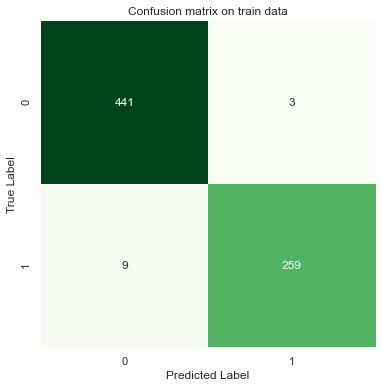

In [30]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Here is the classification report for our training data.
## Confusion Matrix applied on the train data.m

In [31]:
matrix = classification_report(y_train, train_preds_cm)
print('Classification report :\n', matrix)

Classification report :
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       444
           1       0.99      0.97      0.98       268

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [32]:
test_preds_cm = clf1.predict(x_test)
cm = confusion_matrix(y_test, test_preds_cm)

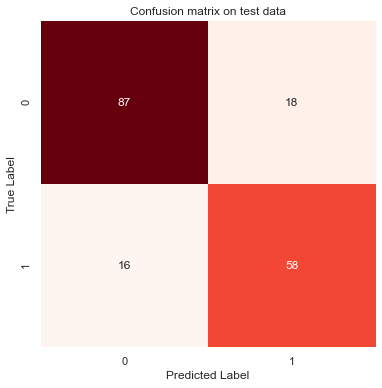

In [33]:
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Confusion Matrix applied on the test data.
### Here is the classification report for our testing data.

In [34]:
matrix = classification_report(y_test, test_preds_cm)
print('Classification report :\n', matrix)

Classification report :
               precision    recall  f1-score   support

           0       0.84      0.83      0.84       105
           1       0.76      0.78      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.81      0.81       179



## 1. We applied Cross validation on all the 4 Machine Learning Algorithm Models that we have used for this prob.
### K-Fold Cross Validation randomly splits the training data into K subsets called folds, the folds value is adjusted by inputing the value of "cv" inside the cross_val_score() function. 


# We used "cv=7" here for all the models, that is we split the training data into 7 Folds. 
### We then printed the scores of the 7 different folds differently, their mean scores and Standard Deviation scores

In [35]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()
knc = KNeighborsClassifier(5)


#### K-fold Cross Validation using Decision Tree :

In [36]:
dt_cv_scores = cross_val_score(dt, x_train, y_train, cv=7, scoring = "accuracy")

print("Scores:", dt_cv_scores)
print("Standard Deviation:", dt_cv_scores.std())
print("Mean:", round(dt_cv_scores.mean()*100,2))


Scores: [0.74509804 0.65686275 0.74509804 0.75490196 0.74509804 0.75247525
 0.77227723]
Standard Deviation: 0.03464042553465419
Mean: 73.88


#### K-fold Cross Validation using Random Forest :

In [37]:
rf_cv_scores = cross_val_score(rf, x_train, y_train, cv=7, scoring = "accuracy")

print("Scores:", rf_cv_scores)
print("Standard Deviation:", rf_cv_scores.std())
print("Mean:", round(rf_cv_scores.mean()*100,2))

D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed whe

Scores: [0.74509804 0.73529412 0.80392157 0.80392157 0.80392157 0.73267327
 0.86138614]
Standard Deviation: 0.04423771116956683
Mean: 78.37


D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


#### K-fold Cross Validation using Logistic Regression :

In [38]:
lr_cv_scores = cross_val_score(lr, x_train, y_train, cv=7, scoring = "accuracy")

print("Scores:", lr_cv_scores)
print("Standard Deviation:", lr_cv_scores.std())
print("Mean:", round(lr_cv_scores.mean()*100,2))


D:\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
D:\Software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Software\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  ret

Scores: [0.82352941 0.71568627 0.87254902 0.81372549 0.74509804 0.75247525
 0.85148515]
Standard Deviation: 0.05470073893938745
Mean: 79.64


#### K-fold Cross Validation using K-Neighbor Class :

In [39]:
knc_cv_scores = cross_val_score(knc, x_train, y_train, cv=7, scoring = "accuracy")

print("Scores:", knc_cv_scores)
print("Standard Deviation:", knc_cv_scores.std())
print("Mean:", round(knc_cv_scores.mean()*100,2))

Scores: [0.60784314 0.64705882 0.62745098 0.66666667 0.65686275 0.61386139
 0.74257426]
Standard Deviation: 0.04221289804643436
Mean: 65.18


D:\Software\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Software\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Software\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
D:\Software\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

### We can analyse after runnung the cross validation on the 4 models, the random forest and the logistic regression have the highest mean score. But taking into account of the standard deviaton the better model to choose would be the random forest model. And our earlier prediction on the test data also suggests the same.

###  



# 2. GridSearch on random forest and decision tree algorithm.

## i) GridSearch on Random Forest :

   ### Using [5,10,20,30] Decision Trees and [4,5,6,8] of Max Depth for each trees and with a fold of 5. And then   printing the best    combination out of all the possible combinations using grid search and the score of the best combination.

In [40]:
param_grid = [
    # (4×4) combinations of hyperparameters
    {'n_estimators': [5, 10, 20, 30], 'max_depth': [4, 5, 6, 8]},
  ]
# train across 5 folds, that's a total of (16+6)*5=110 rounds of training 
grid_search_rf = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search_rf.fit(x_train, y_train)

D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [4, 5, 6, 8],
                          'n_estimators': [5, 10, 20, 30]}],
             return_train_score=True, scoring='accuracy')

In [41]:
cvres = grid_search_rf.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(round(mean_score*100,2), params)

78.93 {'max_depth': 4, 'n_estimators': 5}
81.04 {'max_depth': 4, 'n_estimators': 10}
80.19 {'max_depth': 4, 'n_estimators': 20}
80.47 {'max_depth': 4, 'n_estimators': 30}
81.03 {'max_depth': 5, 'n_estimators': 5}
80.19 {'max_depth': 5, 'n_estimators': 10}
80.89 {'max_depth': 5, 'n_estimators': 20}
80.47 {'max_depth': 5, 'n_estimators': 30}
81.18 {'max_depth': 6, 'n_estimators': 5}
80.62 {'max_depth': 6, 'n_estimators': 10}
80.33 {'max_depth': 6, 'n_estimators': 20}
80.76 {'max_depth': 6, 'n_estimators': 30}
79.77 {'max_depth': 8, 'n_estimators': 5}
79.63 {'max_depth': 8, 'n_estimators': 10}
81.03 {'max_depth': 8, 'n_estimators': 20}
81.17 {'max_depth': 8, 'n_estimators': 30}


In [42]:
print("Best Combination for Random Forest : ", grid_search_rf.best_params_)

Best Combination for Random Forest :  {'max_depth': 6, 'n_estimators': 5}


In [43]:
print("Best Score for Random Forest combination : ", round(grid_search_rf.best_score_*100,2))

Best Score for Random Forest combination :  81.18


## ii) Decision tree :
   
   ### using max depth of [4,6,8,10,15] for each trees and with a fold of 5 . And then printing the best combinatiom and the score of the best combination

In [44]:
param_grid = [
    # (8) combinations of hyperparameters
    {'max_depth': [4, 6, 8, 10, 15, 20, 30, 50]},
  ]
# train across 5 folds, that's a total of (8)*5=40 rounds of training 
grid_search_dt = GridSearchCV(rf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search_dt.fit(x_train, y_train)

D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Software\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed whe

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [4, 6, 8, 10, 15, 20, 30, 50]}],
             return_train_score=True, scoring='accuracy')

In [45]:
cvres = grid_search_dt.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(round(mean_score*100,2), params)

80.05 {'max_depth': 4}
81.18 {'max_depth': 6}
80.89 {'max_depth': 8}
80.47 {'max_depth': 10}
79.35 {'max_depth': 15}
78.93 {'max_depth': 20}
79.07 {'max_depth': 30}
78.79 {'max_depth': 50}


In [46]:
print("Best Combination for Decision Tree : ", grid_search_dt.best_params_)

Best Combination for Decision Tree :  {'max_depth': 6}


In [47]:
print("Best Score for Decision Tree combination : ", round(grid_search_dt.best_score_*100,2))

Best Score for Decision Tree combination :  81.18


### As we can see from the score, that fine tuning the model using grid search to tweak both Random forest and Decision Tree helped improved the accuracy score. The score for the Decision Tree especially improved significantly after adjusting the max_depth settings using GridSearchCV. 

### If we compare the decision tree scores with the earlier prediction score of decicison tree from assignment-1 then we can find a significant improvement for best score, it's also the case for random forest algorithm.`

#    

# 3. Applying PCA :

## we try to reduce the features, to see if it improves it the accuracy score. We try out with no. of features set to 3 and 4 using PCA() transformation on Random forest model and Decision tree and then check the score for any improvement. 

In [48]:
df_train_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    float64
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 48.9 KB


### We will try to reduce the features from 7 to 3 and 4 and check for improvement.

In [49]:
pca = PCA(n_components=3)
pca_train_data = pca.fit_transform(x_train)
pca_test_data = pca.transform(x_test)

rfd = RandomForestClassifier()
rfd.fit(pca_train_data, y_train)
rfd_y_pred = rfd.predict(pca_test_data)
rfd_accuracy = accuracy_score(y_test,rfd_y_pred) * 100
print("accuracy=",rfd_accuracy)

accuracy= 77.6536312849162


<ipython-input-49-eeec5c94e402>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfd.fit(pca_train_data, y_train)


In [50]:
pca = PCA(n_components=4)
pca_train_data = pca.fit_transform(x_train)
pca_test_data = pca.transform(x_test)

rfd = RandomForestClassifier()
rfd.fit(pca_train_data, y_train)
rfd_y_pred = rfd.predict(pca_test_data)
rfd_accuracy = accuracy_score(y_test,rfd_y_pred) * 100
print("accuracy=",rfd_accuracy)

<ipython-input-50-3f087febdb56>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfd.fit(pca_train_data, y_train)


accuracy= 74.86033519553072


In [51]:
pca = PCA(n_components=3)
pca_train_data = pca.fit_transform(x_train)
pca_test_data = pca.transform(x_test)

dt = DecisionTreeClassifier()
dt.fit(pca_train_data, y_train)
dt_y_pred = dt.predict(pca_test_data)
dt_accuracy = accuracy_score(y_test,dt_y_pred) * 100
print("accuracy=",dt_accuracy)

accuracy= 65.92178770949721


In [52]:
pca = PCA(n_components=4)
pca_train_data = pca.fit_transform(x_train)
pca_test_data = pca.transform(x_test)

dt = DecisionTreeClassifier()
dt.fit(pca_train_data, y_train)
dt_y_pred = dt.predict(pca_test_data)
dt_accuracy = accuracy_score(y_test,dt_y_pred) * 100
print("accuracy=",dt_accuracy)

accuracy= 70.39106145251397


## By looking at the accuracy score after applying pca transformation on the decision tree and random forest model, we can conclude that for these instances PCA wasn't able to improve the accuracy of the original models above (without pca);

## Rather the accuracy score declined after application of PCA on these two models.

# ----------------------------------------------------------------------------------------------------


# ----------------------------------------------------------------------------------------------------

# 

# Now we import our testing.csv for making predictions after completion of our ML model training the same we imported the training file. 

In [53]:
# Importing test.csv
test_data = pd.read_csv("test.csv")
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [55]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# For testing data also we will also need to do the steps of preprocessing that we did earlier for training data only then we can predict whether a passenger will survive or not. 

In [56]:
median = test_data["Age"].median()
print(median)

27.0


In [57]:
rand_age = np.random.randint(median, size = 86)
age_slice = test_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
test_data["Age"] = age_slice

In [58]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

In [59]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [60]:
col_to_drop = ["PassengerId", "Ticket", "Cabin", "Name"]
test_data.drop(col_to_drop, axis=1, inplace=True)
test_data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
5,3,male,14.0,0,0,9.2250,S
6,3,female,30.0,0,0,7.6292,Q
7,2,male,26.0,1,1,29.0000,S
8,3,female,18.0,0,0,7.2292,C
9,3,male,21.0,2,0,24.1500,S


In [61]:
test_data_sex = test_data[["Sex"]]
ordinal_encoder = OrdinalEncoder()
test_data["Sex"] = ordinal_encoder.fit_transform(test_data_sex)

test_data_embarked = test_data[["Embarked"]]
ordinal_encoder = OrdinalEncoder()
test_data["Embarked"] = ordinal_encoder.fit_transform(test_data_embarked)
test_data.head(10)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,34.5,0,0,7.8292,1.0
1,3,0.0,47.0,1,0,7.0000,2.0
2,2,1.0,62.0,0,0,9.6875,1.0
3,3,1.0,27.0,0,0,8.6625,2.0
4,3,0.0,22.0,1,1,12.2875,2.0
5,3,1.0,14.0,0,0,9.2250,2.0
6,3,0.0,30.0,0,0,7.6292,1.0
7,2,1.0,26.0,1,1,29.0000,2.0
8,3,0.0,18.0,0,0,7.2292,0.0
9,3,1.0,21.0,2,0,24.1500,2.0


In [62]:
x_test = test_data
y_pred = clf1.predict(x_test)
originaltest_data = pd.read_csv("test.csv")
submission = pd.DataFrame({
        "PassengerId": originaltest_data["PassengerId"],
        "Survived": y_pred
    })
submission.head(20)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [63]:
# submission.to_csv("1821891642sb.csv", index=False)

# We finally import the csv file to submit on Kaggle using to_csv function of the pandas library. Our final score on the kaggle came out to be 0.75837or 75.8% accurate,